In [ ]:
# 1 - 뉴스 기사 데이터를 TF-IDF feature로 표현
# 1.1 분류 모델의 학습에 사용할 학습 데이터 만들기

import pandas as pd
import numpy as np


# TF- IDF 만들기
# 1) 카테고리 별로 구분해서 데이터프레임 만들기
import os


def read_files(directory_path, category):
    data = []

    # 디렉토리 내 모든 파일에 대해 반복
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)

        # 파일인지 확인
        if os.path.isfile(file_path):
            base_filename = os.path.basename(filename) # 파일 이름

            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    line = line.strip()  # 줄 양 끝의 공백 제거
                    if line:  # 비어 있지 않은 줄만 처리
                        try:
                            # 입력 예: "3       1순위서   1/SN+순위/NNG+서/JKB"
                            parts = line.split()  # 공백으로 분리
                            if len(parts) > 1:  # 필요한 부분이 있는지 확인
                                morphemes = parts[1].split('+')  # 형태소 부분만 가져오기
                                for morpheme in morphemes:
                                    # 형태소를 '/'로 분리
                                    split_morpheme = morpheme.split('/')
                                    # 모든 형태소에 대해 처리
                                    if len(split_morpheme) >= 2:  # 품사가 있는 경우
                                        word = split_morpheme[1]  # 형태소는 두 번째 요소
                                        pos = split_morpheme[0]    # 품사는 첫 번째 요소
                                        data.append((word, pos, category, base_filename))  # 형태소와 품사를 모두 읽어오도록
                                    else:
                                        print(f"Unexpected format in {filename}: {morpheme}")  # 예외 발생 시 출력

                        except ValueError as e:
                            print(f"Skipping line in {filename}: {line} - Error: {e}")  # 예외 발생 시 출력

    # DataFrame 생성
    df = pd.DataFrame(data, columns=["품사", "형태소", "분류", "파일 이름"])
    return df

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 폴더 경로 설정
child_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/child'
culture_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/culture'
economy_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/economy'
education_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/education'
health_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/health'
life_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/life'
person_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/person'
policy_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/policy'
society_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Input_Data/society'



# 폴더 내 파일 읽기
child_mor = read_files(child_path, 0)
culture_mor = read_files(culture_path, 1)
economy_mor = read_files(economy_path, 2)
education_mor = read_files(education_path, 3)
health_mor = read_files(health_path, 4)
life_mor = read_files(life_path, 5)
person_mor = read_files(person_path, 6)
policy_mor = read_files(policy_path, 7)
society_mor = read_files(society_path, 8)


# 결과 출력
print(child_mor)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unexpected format in 0_(POS)child_122.txt: 
Unexpected format in 0_(POS)child_64.txt: 
Unexpected format in 0_(POS)culture_13.txt: 
Unexpected format in 0_(POS)culture_13.txt: 
Unexpected format in 0_(POS)culture_177.txt: 
Unexpected format in 0_(POS)culture_191.txt: 
Unexpected format in 0_(POS)economy_122.txt: 
Unexpected format in 0_(POS)economy_159.txt: 
Unexpected format in 0_(POS)health_140.txt: 
Unexpected format in 0_(POS)health_162.txt: 
Unexpected format in 0_(POS)health_8.txt: %
Unexpected format in 0_(POS)health_8.txt: %
Unexpected format in 0_(POS)health_96.txt: 
Unexpected format in 0_(POS)person_101.txt: %
Unexpected format in 0_(POS)person_101.txt: %
Unexpected format in 0_(POS)person_135.txt: 
Unexpected format in 0_(POS)person_64.txt: 
Unexpected format in 0_(POS)person_84.txt: 
Unexpected format in 0_(POS)policy_196.txt: %
Unexpected format

In [ ]:
# 명사류 형태소 : NNG, NNP만 고려
child_mor = child_mor[child_mor['품사'].isin(['NNG', 'NNP'])]
culture_mor = culture_mor[culture_mor['품사'].isin(['NNG', 'NNP'])]
economy_mor = economy_mor[economy_mor['품사'].isin(['NNG', 'NNP'])]
education_mor = education_mor[education_mor['품사'].isin(['NNG', 'NNP'])]
health_mor = health_mor[health_mor['품사'].isin(['NNG', 'NNP'])]
life_mor = life_mor[life_mor['품사'].isin(['NNG', 'NNP'])]
person_mor = person_mor[person_mor['품사'].isin(['NNG', 'NNP'])]
policy_mor = policy_mor[policy_mor['품사'].isin(['NNG', 'NNP'])]
society_mor = society_mor[society_mor['품사'].isin(['NNG', 'NNP'])]

print(child_mor)

        품사    형태소  분류                파일 이름
0      NNG    복지부   0  0_(POS)child_12.txt
2      NNG    농어촌   0  0_(POS)child_12.txt
3      NNG   양육수당   0  0_(POS)child_12.txt
4      NNG    재신청   0  0_(POS)child_12.txt
7      NNG  보건복지부   0  0_(POS)child_12.txt
...    ...    ...  ..                  ...
60074  NNG     전망   0   0_(POS)child_1.txt
60078  NNG     전국   0   0_(POS)child_1.txt
60080  NNG  여성장애인   0   0_(POS)child_1.txt
60088  NNG    지난해   0   0_(POS)child_1.txt
60097  NNG     추세   0   0_(POS)child_1.txt

[18001 rows x 4 columns]


In [ ]:
# 형태소의 빈도수 계산

df = pd.concat([child_mor, culture_mor, economy_mor, education_mor, health_mor, life_mor, person_mor, policy_mor, society_mor], axis=0)

# 형태소의 빈도수 계산
frequency_df = df['형태소'].value_counts().reset_index()
frequency_df.columns = ['형태소', '빈도수']

# 빈도수에 따라 정렬
frequency_df = frequency_df.sort_values(by='빈도수', ascending=False)

# 상위 5000개 선택
top_5000 = frequency_df.head(5000)

# 결과 출력
print(top_5000)


      형태소   빈도수
0     장애인  5535
1      장애  1308
2      경우  1083
3      지원  1076
4      의원  1054
...   ...   ...
4836  다양화     7
4835   금번     7
4834   운용     7
4833   조리     7
4832  대학교     7

[5000 rows x 2 columns]


In [ ]:
import os
import pandas as pd
import numpy as np


def calculate_tf_idf(df, frequency_data):
    grouped = df.groupby('파일 이름')
    tf_idf_results = {}

    for file_name, group in grouped:
        # 전체 문서 수
        N = len(group)

        # 각 단어의 TF 계산
        tf = {}
        words = group['형태소'].tolist()
        word_count = len(words)

        for word in words:
            if word in tf:
                tf[word] += 1
            else:
                tf[word] = 1

        # Term Frequency 비율로 변환
        tf = {word: count / word_count for word, count in tf.items()}

        # IDF 계산
        idf = {}
        for word in frequency_data['형태소']:
            document_count = sum(1 for w in words if w == word)
            if document_count > 0:
                idf[word] = np.log(N / document_count)
            else:
                idf[word] = 0

        # TF-IDF 계산: frequency_data의 모든 단어를 포함
        tf_idf = {word: tf.get(word, 0) * idf.get(word, 0) for word in frequency_data['형태소']}

        tf_idf_results[file_name] = list(tf_idf.values())

    return tf_idf_results


#  Main
category = ['child', 'culture','economy', 'education', 'health', 'life','person', 'policy', 'society']
mor_list = [child_mor, culture_mor, economy_mor, education_mor, health_mor, life_mor, person_mor, policy_mor, society_mor]

for n in range(len(category)) :
  output_directory = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/Input_data/' + category[n]

  # TF-IDF 계산
  tf_idf = calculate_tf_idf(mor_list[n], top_5000)

  # 결과 저장
  save_tf_idf(tf_idf, output_directory)

  print(n, "tf-idf file saved.")


0 tf-idf file saved.
1 tf-idf file saved.
2 tf-idf file saved.
3 tf-idf file saved.
4 tf-idf file saved.
5 tf-idf file saved.
6 tf-idf file saved.
7 tf-idf file saved.
8 tf-idf file saved.


In [67]:
# test_data


t_child_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/child'
t_culture_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/culture'
t_economy_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/economy'
t_education_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/education'
t_health_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/health'
t_life_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/life'
t_person_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/person'
t_policy_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/policy'
t_society_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/Corpus/Test_Data/society'

t_child_mor = read_files(t_child_path, 0)
t_culture_mor = read_files(t_culture_path, 1)
t_economy_mor = read_files(t_economy_path, 2)
t_education_mor = read_files(t_education_path, 3)
t_health_mor = read_files(t_health_path, 4)
t_life_mor = read_files(t_life_path, 5)
t_person_mor = read_files(t_person_path, 6)
t_policy_mor = read_files(t_policy_path, 7)
t_society_mor = read_files(t_society_path, 8)



# 명사류 형태소 : NNG, NNP만 고려
t_child_mor = t_child_mor[t_child_mor['품사'].isin(['NNG', 'NNP'])]
t_culture_mor = t_culture_mor[t_culture_mor['품사'].isin(['NNG', 'NNP'])]
t_economy_mor = t_economy_mor[t_economy_mor['품사'].isin(['NNG', 'NNP'])]
t_education_mor = t_education_mor[t_education_mor['품사'].isin(['NNG', 'NNP'])]
t_health_mor = t_health_mor[t_health_mor['품사'].isin(['NNG', 'NNP'])]
t_life_mor = t_life_mor[t_life_mor['품사'].isin(['NNG', 'NNP'])]
t_person_mor = t_person_mor[t_person_mor['품사'].isin(['NNG', 'NNP'])]
t_policy_mor = t_policy_mor[t_policy_mor['품사'].isin(['NNG', 'NNP'])]
t_society_mor = t_society_mor[t_society_mor['품사'].isin(['NNG', 'NNP'])]

#  Main
category = ['child', 'culture','economy', 'education', 'health', 'life','person', 'policy', 'society']
t_mor_list = [t_child_mor, t_culture_mor, t_economy_mor, t_education_mor, t_health_mor, t_life_mor, t_person_mor, t_policy_mor, t_society_mor]

for n in range(len(category)) :
  output_directory = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/test_data/' + category[n]

  # TF-IDF 계산
  tf_idf = calculate_tf_idf(t_mor_list[n], top_5000)

  # 결과 저장
  save_tf_idf(tf_idf, output_directory)

  print(n, "tf-idf file saved.")

0 tf-idf file saved.
1 tf-idf file saved.
2 tf-idf file saved.
3 tf-idf file saved.
4 tf-idf file saved.
5 tf-idf file saved.
6 tf-idf file saved.
7 tf-idf file saved.
8 tf-idf file saved.


In [68]:
# 명사류 형태소 : NNG, NNP만 고려
t_child_mor = t_child_mor[t_child_mor['품사'].isin(['NNG', 'NNP'])]
t_culture_mor = t_culture_mor[t_culture_mor['품사'].isin(['NNG', 'NNP'])]
t_economy_mor = t_economy_mor[t_economy_mor['품사'].isin(['NNG', 'NNP'])]
t_education_mor = t_education_mor[t_education_mor['품사'].isin(['NNG', 'NNP'])]
t_health_mor = t_health_mor[t_health_mor['품사'].isin(['NNG', 'NNP'])]
t_life_mor = t_life_mor[t_life_mor['품사'].isin(['NNG', 'NNP'])]
t_person_mor = t_person_mor[t_person_mor['품사'].isin(['NNG', 'NNP'])]
t_policy_mor = t_policy_mor[t_policy_mor['품사'].isin(['NNG', 'NNP'])]
t_society_mor = t_society_mor[t_society_mor['품사'].isin(['NNG', 'NNP'])]

#  Main
category = ['child', 'culture','economy', 'education', 'health', 'life','person', 'policy', 'society']
t_mor_list = [t_child_mor, t_culture_mor, t_economy_mor, t_education_mor, t_health_mor, t_life_mor, t_person_mor, t_policy_mor, t_society_mor]

for n in range(len(category)) :
  output_directory = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/test_data/' + category[n]

  # TF-IDF 계산
  tf_idf = calculate_tf_idf(t_mor_list[n], top_5000)

  # 결과 저장
  save_tf_idf(tf_idf, output_directory)

  print(n, "tf-idf file saved.")


0 tf-idf file saved.
1 tf-idf file saved.
2 tf-idf file saved.
3 tf-idf file saved.
4 tf-idf file saved.
5 tf-idf file saved.
6 tf-idf file saved.
7 tf-idf file saved.
8 tf-idf file saved.


In [ ]:
# 1.3 학습 데이터에서 사용하는 모든 문서의 tf-idf 정보를 기록한 텍스트파일 작성


def merge_text_files(input_directory, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        # 모든 하위 폴더와 파일 탐색
        for root, dirs, files in os.walk(input_directory):
            for file in files:
                if file.endswith('.txt'):  # 텍스트 파일만 선택
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as infile:
                        content = infile.read()
                        included_index = next((category.index(cat) for cat in category if cat in file), None)
                        outfile.write(content + '\t' + str(included_index) + '\n')

# 사용 예시
input_directory = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/Input_data'  # 폴더 경로
output_file = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/all_train_features.txt'  # 출력 파일 경로

merge_text_files(input_directory, output_file)

print("merge completed")




merge completed


In [69]:
# 1.4 테스트 데이터에서 사용하는 모든 문서의 tf-idf 정보를 기록한 텍스트파일 작성


def merge_text_files(input_directory, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        # 모든 하위 폴더와 파일 탐색
        for root, dirs, files in os.walk(input_directory):
            for file in files:
                if file.endswith('.txt'):  # 텍스트 파일만 선택
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as infile:
                        content = infile.read()
                        included_index = next((category.index(cat) for cat in category if cat in file), None)
                        outfile.write(content + '\t' + str(included_index) + '\n')

# 사용 예시
input_directory = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/test_data'  # 폴더 경로
output_file = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/all_test_features.txt'  # 출력 파일 경로

merge_text_files(input_directory, output_file)

print("merge completed")


merge completed


In [63]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

def read_data(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None)
    return df

def train_svm_model(data, labels):
    model = svm.SVC(kernel='linear')
    model.fit(data, labels)
    return model

# 사용 예시
input_file_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/all_train_features.txt'
output_model_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/svm_model.pkl'


df = read_data(input_file_path)


labels = df.iloc[:, -1]
data = df.iloc[:, :-1]


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
model = train_svm_model(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

# joblib.dump(model, output_model_path)

# print("model saved.")


              precision    recall  f1-score   support

           0       0.75      0.43      0.55        28
           1       0.75      0.64      0.69        33
           2       0.86      0.50      0.63        36
           3       1.00      0.43      0.60        21
           4       0.40      0.67      0.50        39
           5       0.77      0.43      0.56        23
           6       0.00      0.00      0.00        34
           7       0.80      0.66      0.72        61
           8       0.46      0.98      0.63        63

    accuracy                           0.59       338
   macro avg       0.64      0.53      0.54       338
weighted avg       0.62      0.59      0.56       338

model saved.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.40      0.57        10
           1       1.00      0.80      0.89        10
           2       1.00      0.70      0.82        10
           3       1.00      0.60      0.75        10
           4       0.33      0.60      0.43        10
           5       1.00      0.50      0.67        10
           6       0.00      0.00      0.00        10
           7       0.58      0.73      0.65        15
           8       0.42      0.93      0.58        15

    accuracy                           0.61       100
   macro avg       0.70      0.59      0.60       100
weighted avg       0.68      0.61      0.60       100



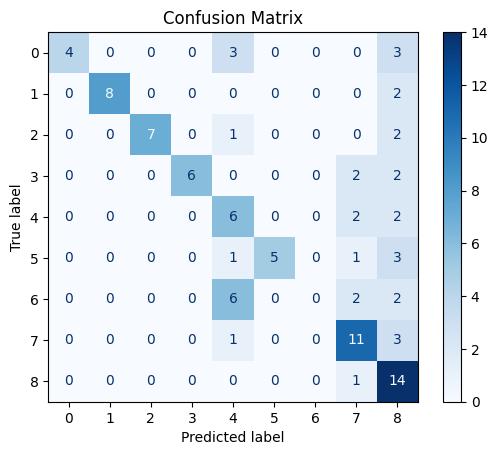

In [70]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

def read_data(file_path):
    df = pd.read_csv(file_path, sep='\t', header=None)
    return df

def train_svm_model(data, labels):
    # SVM 모델 초기화
    model = svm.SVC(kernel='linear')
    model.fit(data, labels)
    return model

def evaluate_svm_model(model, eval_data, eval_labels):
    # 테스트 데이터로 예측
    y_pred = model.predict(eval_data)

    # 결과 출력
    print(classification_report(eval_labels, y_pred))

    # Confusion matrix 계산
    cm = confusion_matrix(eval_labels, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


train_file_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/all_train_features.txt' # 학습 데이터 경로
test_file_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/202035524_백송희/all_test_features.txt'  # 평가 데이터 경로
output_model_path = '/content/drive/MyDrive/NLP labs/Week 8_lab2 files/svm_model.pkl'  # 저장할 모델 경로

train_df = read_data(train_file_path)
train_labels = train_df.iloc[:, -1]
train_data = train_df.iloc[:, :-1]

model = train_svm_model(train_data, train_labels)

test_df = read_data(test_file_path)
test_labels = test_df.iloc[:, -1]
test_data = test_df.iloc[:, :-1]

evaluate_svm_model(model, test_data, test_labels)


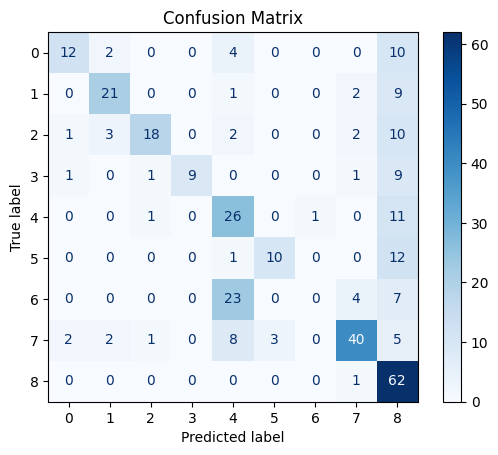

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()